# Introduction to PyTorch

# Fundamental Building Blocks

* Tensor and Tensor Operations

* PyTorch’s Tensor Libraries

* Computational Graph

* Gradient Computation

* Linear Mapping

* PyTorch’s non-linear activation functions:
    * Sigmoid, tanh, ReLU, Leaky ReLU

* Loss Function

* Optimization algorithms used in training deep learning models

# A 2-Layer Feed-Forward Neural Network Architecture

## Some notations on a simple feed-forward network

$\bar{\mathbf{X}} = \{X_1, X_2, \dots, X_K, 1 \}$ is a $n \times K$ matrix of $K$ input features from $n$ training examples

$X_k$ $ (k = 1,\dots,K) $ is a $n \times 1$ vector of n examples corresponding to feature $k$

$\bar{\mathbf{W}}_{Xh} = \{w_1, w_2 \dots, w_p \}$

$\bar{\mathbf{W}}_{Xh}$ of size $PK$ 

where $P$ is the number of units in the hidden layer 1 

and K is the number of input features

$\mathbf{b}$ bias



## A Simple Neural Network Architeture

The input layer contains $d$ nodes that transmit the $d$ features $\mathbf{X} = \{x_1, \dots, x_d, 1 \}$ with edges of weights $\mathbf{W} = \{w_1, \dots, w_d, b \}$ to an output node.

Linear function (or linear mapping of data): $\mathbf{W} \cdot \mathbf{X} + b = b + \sum_{i=1}^d w_i x_i $

$ y = b + \sum_{i=1}^d w_i x_i $ where $w$'s and $b$ are parameters to be learned

# Tensor and Tensor Operations

There are many types of tensor operations, and we will not cover all of them in this introduction. We will focus on operations that can help us start developing deep learning models immediately.

The official documentation provides a comprehensive list: [pytorch.org](https://pytorch.org/docs/stable/torch.html#tensors)


  * Creation ops: functions for constructing a tensor, like ones and from_numpy 
  
  * Indexing, slicing, joining, mutating ops: functions for changing the shape, stride or content a tensor, like transpose

  * Math ops: functions for manipulating the content of the tensor through computations

    * Pointwise ops: functions for obtaining a new tensor by applying a function to each element independently, like abs and cos

    * Reduction ops: functions for computing aggregate values by iterating through tensors, like mean, std and norm

    * Comparison ops: functions for evaluating numerical predicates over tensors, like equal and max

    * Spectral ops: functions for transforming in and operating in the frequency domain, like stft and hamming_window

    * Other operations: special functions operating on vectors, like cross, or matrices, like trace 
  
    * BLAS and LAPACK operations: functions following the BLAS (Basic Linear Algebra Subprograms) specification for scalar, vector-vector, matrix-vector and matrix-matrix operations 
  
  * Random sampling: functions for generating values by drawing randomly from probability distributions, like randn and normal

  * Serialization: functions for saving and loading tensors, like load and save

  * Parallelism: functions for controlling the number of threads for parallel CPU execution, like set_num_threads



In [63]:
# Import torch module
import torch
#torch.__version__
torch.version.__version__

'0.4.1'

## Creating Tensors and Examining tensors

* `rand()`

* `randn()`

* `zeros()`

* `ones()`

* using a `Python list`

### Create a 1-D Tensor

  - PyTorch provides methods to create random or zero-filled tensors
  - Use case: to initialize weights and bias for a NN model

In [10]:
import torch

`torch.rand()` returns a tensor of random numbers from a uniform [0,1) distribution
                                                                                                        
[Source: Torch's random sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

Draw a sequence of 10 random numbers

In [26]:
x = torch.rand(10)

In [12]:
type(x)

torch.Tensor

In [13]:
x.size()

torch.Size([10])

In [16]:
print(x.min(), x.max())

tensor(0.0124) tensor(0.9204)


Draw a matrix of size (10,3) random numbers

In [21]:
W = torch.rand(10,3)

In [23]:
type(W)

torch.Tensor

In [24]:
W.size()

torch.Size([10, 3])

In [25]:
W

tensor([[0.3368, 0.2256, 0.0411],
        [0.1667, 0.1969, 0.5762],
        [0.8185, 0.2851, 0.0234],
        [0.1178, 0.7992, 0.0347],
        [0.3081, 0.2064, 0.4116],
        [0.3813, 0.5909, 0.0176],
        [0.9992, 0.3900, 0.9060],
        [0.4732, 0.9531, 0.8798],
        [0.2312, 0.9389, 0.2118],
        [0.2469, 0.6824, 0.4380]])

Another common random sampling is to generate random number from the standard normal distribution

`torch.randn()` returns a tensor of random numbers from a standard normal distribution (i.e. a normal distribution with mean 0 and variance 1)

[Source: Torch's random sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

In [27]:
W2 = torch.randn(10,3)

In [28]:
type(W2)

torch.Tensor

In [31]:
W2.dtype

torch.float32

In [29]:
W2.shape

torch.Size([10, 3])

In [32]:
W2

tensor([[-0.7918, -1.2779,  0.4351],
        [-1.0512, -0.0283,  0.4857],
        [ 0.1201, -1.3966,  0.8013],
        [ 0.3778, -1.1378,  1.9148],
        [ 0.6353,  0.8897, -0.2411],
        [-1.0669, -1.1097, -0.1241],
        [-0.6969, -0.1187,  0.6369],
        [ 0.6346,  1.2576,  0.1254],
        [ 1.3745, -1.4128,  0.2698],
        [ 0.6360, -0.7880,  0.5088]])

**Note: Though it looks like it is similar to a list of number objects, it is not. A tensor stores its data as unboxed numeric values, so they are not Python objects but C numeric types - 32-bit (4 bytes) float**

`torch.zeros()` can be used to initialize the `bias`

In [37]:
b = torch.zeros(10)

In [42]:
type(b)

torch.Tensor

In [41]:
b.shape

torch.Size([10])

In [43]:
b

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Likewise, `torch.ones()` can be used to create a tensor filled with 1

In [47]:
a = torch.ones(3)

In [55]:
type(a)

torch.Tensor

In [52]:
a.shape

torch.Size([3])

In [54]:
a

tensor([1., 1., 1.])

In [57]:
A = torch.ones((3,3,3))

In [58]:
A

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

Convert a Python list to a tensor

In [59]:
A.shape

torch.Size([3, 3, 3])

In [44]:
l = [1.0, 4.0, 2.0, 1.0, 3.0, 5.0]
torch.tensor(l)

tensor([1., 4., 2., 1., 3., 5.])

Subsetting a tensor: extract the first 2 elements of a 1-D tensor

In [46]:
torch.tensor([1.0, 4.0, 2.0, 1.0, 3.0, 5.0])[:2]

tensor([1., 4.])

### Create a 2-D Tensor

In [10]:
a = torch.ones(3,3)

In [11]:
a

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [12]:
a.size()

torch.Size([3, 3])

In [13]:
b = torch.ones(3,3)

In [14]:
type(b)

torch.Tensor

Simple addition

In [15]:
c = a + b

In [16]:
type(c)

torch.Tensor

In [17]:
c.type()

'torch.FloatTensor'

In [18]:
c.size()

torch.Size([3, 3])

Create a 2-D tensor by passing a list of lists to the constructor

In [19]:
d = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])

In [20]:
d

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])

In [21]:
d.size()

torch.Size([3, 2])

In [22]:
# We will obtain the same result by using `shape`
d.shape

torch.Size([3, 2])

$[3,2]$ indicates the size of the tensor along each of its 2 dimensions

In [23]:
# Using the 0th-dimension index to get the 1st dimension of the 2-D tensor. 
# Note that this is not a new tensor; this is just a different (partial) view of the original tensor
d[0]

tensor([1., 4.])

In [24]:
d

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])

In [25]:
d.storage()

 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.FloatStorage of size 6]

In [26]:
e = torch.tensor([[[1.0, 3.0],
                   [5.0, 7.0]],
                  [[2.0, 4.0],
                   [6.0, 8.0]],
                 ])

In [27]:
e.storage()

 1.0
 3.0
 5.0
 7.0
 2.0
 4.0
 6.0
 8.0
[torch.FloatStorage of size 8]

In [28]:
e.shape

torch.Size([2, 2, 2])

In [29]:
e.storage_offset()

0

In [30]:
e.stride()

(4, 2, 1)

In [31]:
e.size()

torch.Size([2, 2, 2])

In [32]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])

In [33]:
points

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])

In [34]:
points.size()

torch.Size([3, 2])

In [35]:
points.stride()

(2, 1)

In [36]:
points.storage()

 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.FloatStorage of size 6]

## Subset a Tensor

In [38]:
points[2]

tensor([3., 5.])

In [93]:
points[:2]

tensor([[100.,   4.],
        [  2.,   1.]])

In [95]:
points[1:] # all rows but first, implicitly all columns

tensor([[2., 1.],
        [3., 5.]])

In [96]:
points[1:, :] # all rows but first, explicitly all columns

tensor([[2., 1.],
        [3., 5.]])

In [39]:
points[0,0]

tensor(1.)

In [40]:
points[0,1]

tensor(4.)

In [41]:
points[1,0]

tensor(2.)

In [42]:
points[0]

tensor([1., 4.])

**Note the changing the `sub-tensor` extracted (instead of cloned) from the original will change the original tensor**

In [47]:
second_points = points[0]

In [49]:
second_points

tensor([1., 4.])

In [50]:
second_points[0] = 100.0

In [51]:
points

tensor([[100.,   4.],
        [  2.,   1.],
        [  3.,   5.]])

In [52]:
points[0,0]

tensor(100.)

**If we don't want to change the original tensure when changing the `sub-tensor`, we will need to clone the sub-tensor from the original**

In [55]:
a = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])

In [58]:
b = a[0].clone()

In [59]:
b

tensor([1., 4.])

In [60]:
b[0] = 100.0

In [61]:
a

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])

In [62]:
b

tensor([100.,   4.])

## Transpose a Tensor

### Transposing a matrix

In [71]:
a

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])

In [66]:
a_t = a.t()

In [67]:
a_t

tensor([[1., 2., 3.],
        [4., 1., 5.]])

In [68]:
a.storage()

 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.FloatStorage of size 6]

In [69]:
a_t.storage()

 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.FloatStorage of size 6]

**Transposing a tensor does not change its storage**

In [70]:
id(a.storage()) == id(a_t.storage())

True

### Transposing a Multi-Dimensional Array

In [72]:
A = torch.ones(3, 4, 5)

In [73]:
A

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

To transpose a multi-dimensional array, the dimension along which the tanspose is performed needs to be specified

In [74]:
A_t = A.transpose(0,2)

In [75]:
A.size()

torch.Size([3, 4, 5])

In [76]:
A_t.size()

torch.Size([5, 4, 3])

In [77]:
A.stride()

(20, 5, 1)

In [78]:
A_t.stride()

(1, 5, 20)

### Contiguous Tensors

A tensor whose values are laid out in the storage starting from the **right-most dimension** onwards (i.e. moving along rows for a 2D tensor), is defined as contiguous

In [79]:
a

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])

In [80]:
a.is_contiguous()

True

In [81]:
a.storage()

 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.FloatStorage of size 6]

### Tensor Data Type

In [82]:
a.dtype

torch.float32

In [83]:
A.dtype

torch.float32

### Explicitly Specifying a Tensor Type During Creation

In [84]:
torch.zeros(3,2).double()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]], dtype=torch.float64)

In [86]:
torch.zeros(2,3).to(torch.double)

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

### Type Casting

In [87]:
random_nums = torch.randn(10, 1)
random_nums_short = random_nums.type(torch.short)

In [88]:
random_nums.dtype

torch.float32

In [89]:
random_nums_short.dtype

torch.int16

### NumPy Interoperability

In [97]:
x = torch.ones(3,3)

In [98]:
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [99]:
x_np = x.numpy()

In [100]:
x.dtype

torch.float32

In [101]:
x_np.dtype

dtype('float32')

In [102]:
x2 = torch.from_numpy(x_np)
x2.dtype

torch.float32

### Tensor Serialization 

In [103]:
import h5py

/Users/jeffrey/anaconda2/envs/dl/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**A very powerful feature of HDF5 file format is that it allows for indexing datasets on disk and only access the elements of interest. This feature lets you store huge amounts of numerical data, and easily manipulate that data from NumPy.  For reference, see [h5py](https://www.h5py.org/)**

In [104]:
f = h5py.File('ourpoints.hdf5', 'w')
dset = f.create_dataset('coords', data=x2.numpy())
f.close()

In [105]:
f = h5py.File('ourpoints.hdf5', 'r')
dset = f['coords']
last_x2 = dset[1:]

In [106]:
last_x2

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [107]:
# Importantly, we can pass the object and obtain a PyTorch tensor directly

f = h5py.File('ourpoints.hdf5', 'r')
dset = f['coords']
#last_x2 = dset[1:]
last_x2 = torch.from_numpy(dset[1:])
f.close()
last_x2

tensor([[1., 1., 1.],
        [1., 1., 1.]])

### Tensors on GPU

We will discuss more about this in the last section of the course

```python
   matrix_gpu = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 4.0]], device='cuda')
   # transfer a tensor created on the CPU onto GPU using the to method 
   x2_gpu = x2.to(device='cuda') 
    
   points_gpu = points.to(device='cuda:0') 
```

CPU vs. GPU Performance Comparison 
```python
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)
a.matmul(b)

#Move the tensors to GPU
a = a.cuda()
b = b.cuda()
a.matmul(b)

```

# Gradient Computation

Partial derivative of a function of several variables:

$$ \frac{\partial f(x_1, x_2, \dots, x_p)}{\partial x_i} |_{\text{other variables constant}}$$

* `torch.Tensor`

* `torch.autograd` is an engine for computing vector-Jacobian product

* `.requires_grad`

* `.backward()`

* `.grad`

* `.detach()`

* `with torch.no_grad()`

* `Function`

* `Tensor` and `Function` are connected and build up an acyclic graph, that encodes a complete history of computation.

Let's look at a couple of examples:

Example 1

1. Create a variable and set `.requires_grad` to True

In [123]:
import torch
x = torch.ones(5,requires_grad=True)

#from torch.autograd import Variable
#x = Variable(torch.ones(5),requires_grad=True)

In [124]:
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [125]:
x.type

<function Tensor.type>

In [126]:
x.grad

Note that at this point, `x.grad` does not output anything because there is no operation performed on the tensor `x` yet. However, let's create another tensor `y` by performing a few operations (i.e. taking the mean) on the original tensor `x`.

In [127]:
y = x + 2
z = y.mean()

In [128]:
z.type

<function Tensor.type>

In [129]:
z

tensor(3., grad_fn=<MeanBackward1>)

In [130]:
z.backward()
x.grad

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])

In [131]:
x.grad_fn

In [132]:
x.data

tensor([1., 1., 1., 1., 1.])

In [133]:
y.grad_fn

In [134]:
z.grad_fn

Example 2

In [108]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 5
z = 2 * y * y  # 2*(x+5)^2
h = z.mean()

In [109]:
z

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>)

In [110]:
z.shape

torch.Size([2, 2])

In [111]:
h.shape

torch.Size([])

In [112]:
h

tensor(27., grad_fn=<MeanBackward1>)

In [113]:
h.backward()

In [114]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [115]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

# Some notations on a simple feed-forward network

## A Simple Neural Network Architeture

The input layer contains $d$ nodes that transmit the $d$ features $\mathbf{X} = \{x_1, \dots, x_d, 1 \}$ with edges of weights $\mathbf{W} = \{w_1, \dots, w_d, b \}$ to an output node.

Linear function (or linear mapping of data): $\mathbf{W} \cdot \mathbf{X} + b = b + \sum_{i=1}^d w_i x_i $

$ y = b + \sum_{i=1}^d w_i x_i $ where $w$'s and $b$ are parameters to be learned

## Create data

In [133]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                          7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                          2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17 ,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    
    return X, y, train_X, train_Y

## Create (and Initialize) parameters

In [134]:
def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

## Visualize the data

In [146]:
# Get the data
X, y, X_np, y_np = get_data()

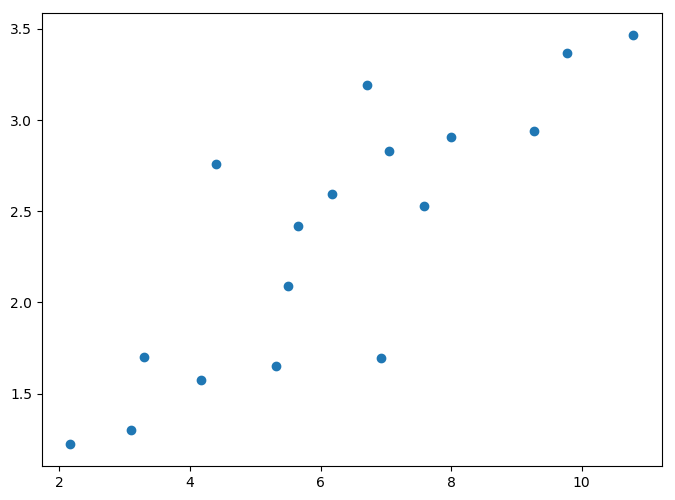

In [147]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

plt.scatter(X_np,y_np)
plt.show()

## Network Implementation

In [148]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

We do not need to implement a neural network model manually.

PyTorch provides a higher-level abstraction in `torch.nn` called **layers**, which will take care of most of these underlying initialization and operations associated with most of the common techniques available in the neural network

## Common Activation Functions

* **Sigmoid**: $\frac{1}{1 + exp(-x)}$


* **Tanh**: $\frac{e^x - e^{-x}}{e^x + e^{-x}}$


* **ReLU**: $max(0,x) + negative_slope∗min(0,x)$


* **LeakyReLU(x)**: $max(0,x) + negative_slope∗min(0,x)$


Reference: [Many more activation functions in PyTorch](https://pytorch.org/docs/stable/nn.html?highlight=activation%20function)

## Define a loss function

In [150]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]

## Optimize the network

In [158]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

In [160]:
learning_rate = 0.0001
x,y,x_np,y_np = get_data()  # x - represents training data,y - represents target variables
w,b = get_weights()         # w,b - Learnable parameters
for i in range(500):
    y_pred = simple_network(x) # function which computes wx + b
    loss = loss_fn(y,y_pred)   # calculates sum of the squared differences of y and y_pred
    if i % 50 == 0: 
        print(loss)
    optimize(learning_rate)    # Adjust w,b to minimize the loss

tensor(36.6271)
tensor(2.6214)
tensor(2.6212)
tensor(2.6209)
tensor(2.6207)
tensor(2.6205)
tensor(2.6203)
tensor(2.6201)
tensor(2.6199)
tensor(2.6198)


/Users/jeffrey/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
